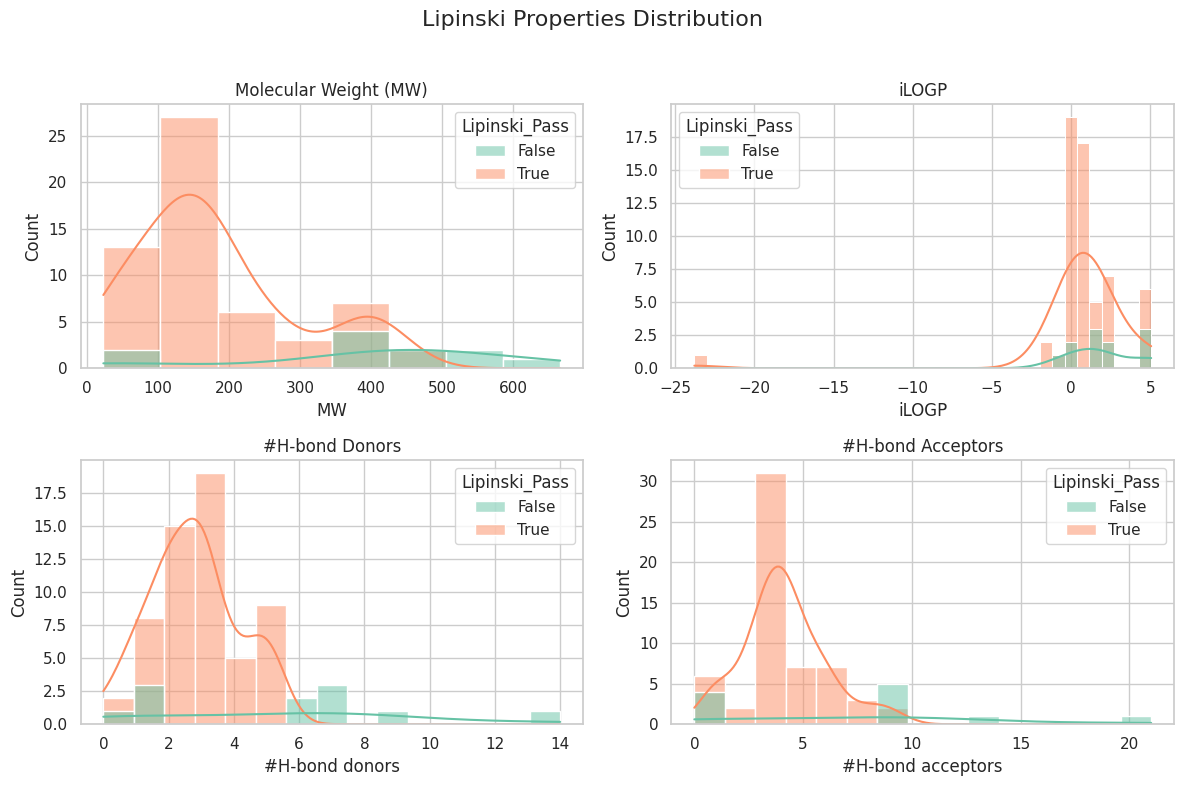

Shortlisted 58 compounds saved to 'shortlisted_compounds.csv'.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'swissadme_s.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Lipinski's Rule of Five criteria
def lipinski_filter(row):
    return (
        row['MW'] <= 500 and
        row['iLOGP'] <= 5 and
        row['#H-bond donors'] <= 5 and
        row['#H-bond acceptors'] <= 10
    )

# Apply filter
df['Lipinski_Pass'] = df.apply(lipinski_filter, axis=1)
shortlisted = df[df['Lipinski_Pass']]

# --------- Create single plot with 4 subplots ---------
properties = ['MW', 'iLOGP', '#H-bond donors', '#H-bond acceptors']
titles = ['Molecular Weight (MW)', 'iLOGP', '#H-bond Donors', '#H-bond Acceptors']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, prop in enumerate(properties):
    sns.histplot(data=df, x=prop, hue='Lipinski_Pass', kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(titles[i])

plt.suptitle("Lipinski Properties Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to make room for the suptitle
plt.show()

# Save shortlisted compounds
shortlisted_file = 'shortlisted_compounds.csv'
shortlisted.to_csv(shortlisted_file, index=False)

print(f"Shortlisted {len(shortlisted)} compounds saved to '{shortlisted_file}'.")
